In [1]:
import pandas as pd
import numpy as np
from astropy.io import fits

import matplotlib.pyplot as plt

import glob

In [2]:
dpath = '/home/jw1624/H1-merian/h1lines/'
haloIDs = [431, 492]

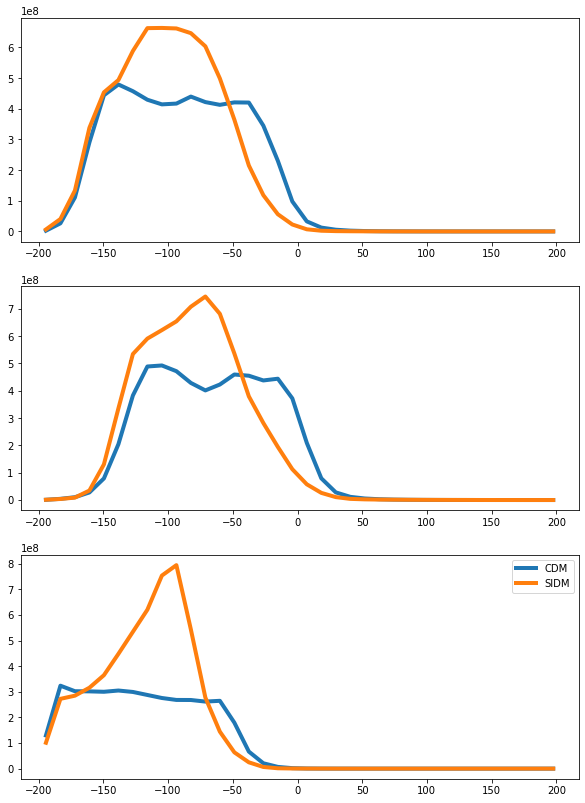

In [4]:
fig,axs = plt.subplots(3,1, figsize=(10,14))

fcdm = glob.glob(dpath+'r431_cdm*')
fsidm= glob.glob(dpath+'r431_sidm*')

fcdm.sort()
fsidm.sort()

for i in range(len(fcdm)):
    cdmx = pd.read_csv(fcdm[i], sep='\s+', header=None)[0]
    cdmy = pd.read_csv(fcdm[i], sep='\s+', header=None)[1]
    
    sidmx = pd.read_csv(fsidm[i], sep='\s+', header=None)[0]
    sidmy = pd.read_csv(fsidm[i], sep='\s+', header=None)[1]
    
    axs[i].plot(cdmx, cdmy, linewidth=4)
    axs[i].plot(sidmx, sidmy, linewidth=4)

plt.legend(['CDM', 'SIDM'])

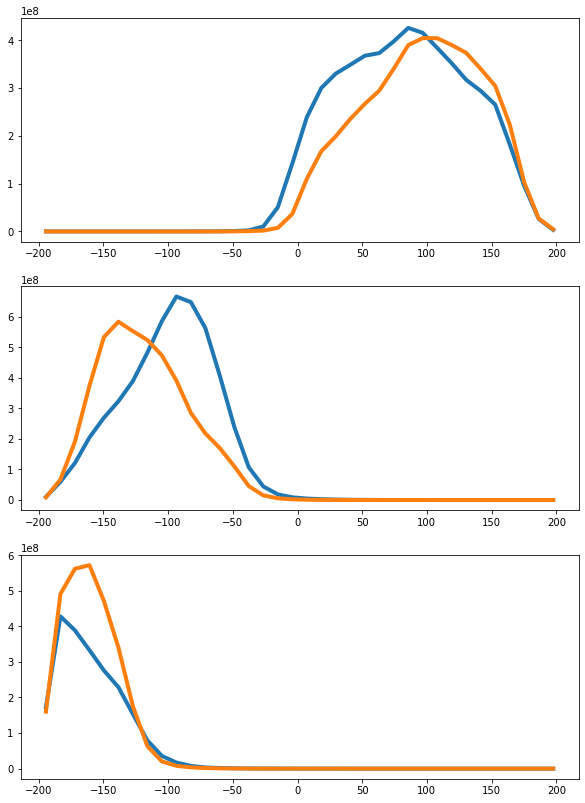

In [5]:
fig,axs = plt.subplots(3,1, figsize=(10,14))

fcdm = glob.glob(dpath+'r492_cdm*')
fsidm= glob.glob(dpath+'r492_sidm*')

fcdm.sort()
fsidm.sort()

for i in range(len(fcdm)):
    cdmx = pd.read_csv(fcdm[i], sep='\s+', header=None)[0]
    cdmy = pd.read_csv(fcdm[i], sep='\s+', header=None)[1]
    
    sidmx = pd.read_csv(fsidm[i], sep='\s+', header=None)[0]
    sidmy = pd.read_csv(fsidm[i], sep='\s+', header=None)[1]
    
    axs[i].plot(cdmx, cdmy, linewidth=4)
    axs[i].plot(sidmx, sidmy, linewidth=4)

## Functional Form 

In [19]:
def makeHIprofile(hID):
    # style params 
    tsize = 24
    asize = 18
    
    lw = 5
    lwW = 2
    
    cCDM = 'tab:blue'
    cCDMw = 'b'
    cSIDM = 'tab:orange'
    cSIDMw = 'r'
    
    orientations = ['x','y','z']
    
    markers=['o','^','x']
    
    # widths to measure
    Ws = [50,20,10]
    
    # fig setup 
    fig,axs = plt.subplots(1,3, figsize=(14,5))
    plt.figure(facecolor='white')
    
    # get the data 
    fcdm = glob.glob(dpath+'r'+str(hID)+'_cdm*')
    fsidm= glob.glob(dpath+'r'+str(hID)+'_sidm*')

    fcdm.sort()
    fsidm.sort()

    # plot
    for i in range(len(fcdm)):
        cdmx = pd.read_csv(fcdm[i], sep='\s+', header=None)[0]
        cdmy = pd.read_csv(fcdm[i], sep='\s+', header=None)[1]

        sidmx = pd.read_csv(fsidm[i], sep='\s+', header=None)[0]
        sidmy = pd.read_csv(fsidm[i], sep='\s+', header=None)[1]

        axs[i].plot(cdmx, cdmy, linewidth=lw+1, c=cCDM)
        axs[i].plot(sidmx, sidmy, linewidth=lw-1, c=cSIDM)
        
        axs[i].set_title(orientations[i]+' Orientation')
        axs[i].set_xlabel(r'Velocity [km/s]', fontsize=asize)
        axs[i].set_ylabel(r'Mass [$M_\odot$]', fontsize=asize)
        
        # do line widths of cmd 
        vmax = max(cdmy)
        for j,p in enumerate(Ws):
            val = (p/100)*vmax

            idxs_mass = np.argwhere(np.diff(np.sign(cdmy - np.full(len(cdmy),val)))).flatten()
            if len(idxs_mass) < 2: continue 
            x1 = (cdmx[idxs_mass[0]]+cdmx[idxs_mass[0]+1])/2
            x2 = (cdmx[idxs_mass[1]]+cdmx[idxs_mass[1]+1])/2
            
            width = x2-x1
            print('CDM W'+str(p)+'_'+orientations[i]+': '+str(width))
            
            axs[i].plot([x1,x2],[val,val], linewidth=lwW, zorder=2, c=cCDMw)
            axs[i].scatter([x1,x2],[val,val], s=25, label='_nolegend_', zorder=2, marker=markers[j], c=cCDMw)
        
        # do line widths of sidm 
        vmax = max(sidmy)
        for j,p in enumerate(Ws):
            val = (p/100)*vmax

            idxs_mass = np.argwhere(np.diff(np.sign(sidmy - np.full(len(sidmy),val)))).flatten()
            if len(idxs_mass) < 2: continue 
            x1 = (sidmx[idxs_mass[0]]+sidmx[idxs_mass[0]+1])/2
            x2 = (sidmx[idxs_mass[1]]+sidmx[idxs_mass[1]+1])/2
            
            width = x2-x1
            print('SIDM W'+str(p)+'_'+orientations[i]+': '+str(width))
            
            axs[i].plot([x1,x2],[val,val], linewidth=lwW, zorder=2, c=cSIDMw)
            axs[i].scatter([x1,x2],[val,val], s=25, label='_nolegend_', zorder=2, marker=markers[j], c=cSIDMw)
    
    fig.suptitle('HI Profile for Galaxy '+str(hID), fontsize=tsize, fontfamily='serif')
    axs[0].legend(['CDM', 'SIDM'])
    
    plt.tight_layout()

CDM W50_x: 145.599993
CDM W20_x: 179.1999928
CDM W10_x: 179.1999928
SIDM W50_x: 123.1999935
SIDM W20_x: 145.59999299999998
SIDM W10_x: 156.799993
CDM W50_y: 134.3999978
CDM W20_y: 156.79999235
CDM W10_y: 179.199992
SIDM W50_y: 100.79999799999999
SIDM W20_y: 134.39999295
SIDM W10_y: 156.7999928
CDM W50_z: 145.5999935
SIDM W50_z: 67.199994
SIDM W20_z: 123.199994


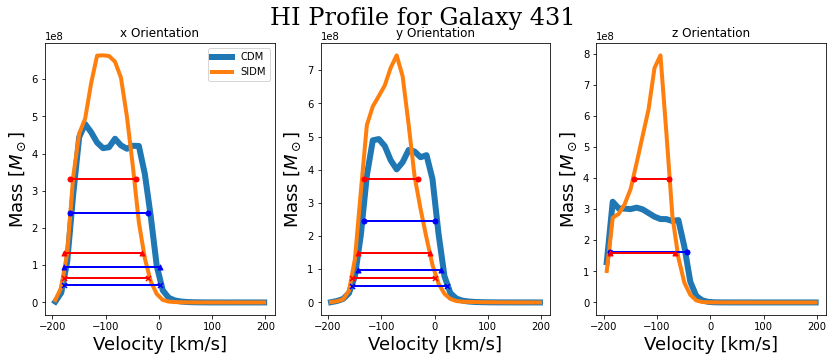

<Figure size 432x288 with 0 Axes>

In [20]:
hID = haloIDs[0]
makeHIprofile(hID)
plt.savefig('../figures/HIProfiles/HI_'+str(hID)+'.png')